### Imports

In [80]:
import pandas as pd
import numpy as np
from pandas_datareader.data import DataReader
import matplotlib.pyplot as plt
import yfinance as yf
yf.pdr_override()


In [81]:
# Data Extraction
start_date = '2017-01-01'
end_date = '2022-06-01'
symbol ='SPY'

df = DataReader(symbol,start_date,end_date)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,199.819550,91366500
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.008301,78744400
2017-01-05,226.270004,226.580002,225.479996,226.399994,200.848618,78379000
2017-01-06,226.529999,227.750000,225.899994,227.210007,201.567215,71559900
2017-01-09,226.910004,227.070007,226.419998,226.460007,200.901855,46939700


### Feature Adjustments

In [82]:
# add moving average
df['ma_12'] = df['Adj Close'].rolling(window=12).mean()
df['ma_21'] = df['Adj Close'].rolling(window=21).mean()
df.loc[df['ma_12'] > df['ma_21'], 'signal'] = 1
df.loc[df['ma_12'] <= df['ma_21'], 'signal'] = 0

# we shift the signal by 1 day to avoid look-ahead bias
df['signal'] = df['signal'].shift(1)

df.head(30)

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal
Date,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,199.819550,91366500,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.008301,78744400,NaN,NaN,NaN
2017-01-05,226.270004,226.580002,225.479996,226.399994,200.848618,78379000,NaN,NaN,NaN
2017-01-06,226.529999,227.750000,225.899994,227.210007,201.567215,71559900,NaN,NaN,NaN
2017-01-09,226.910004,227.070007,226.419998,226.460007,200.901855,46939700,NaN,NaN,NaN
2017-01-10,226.479996,227.449997,226.009995,226.460007,200.901855,63771900,NaN,NaN,NaN
2017-01-11,226.360001,227.100006,225.589996,227.100006,201.469604,74650000,NaN,NaN,NaN
2017-01-12,226.500000,226.750000,224.960007,226.529999,200.963943,72113200,NaN,NaN,NaN
2017-01-13,226.729996,227.399994,226.690002,227.050003,201.425232,62717900,NaN,NaN,NaN


In [83]:
# add returns
df['lreturns_bench']=np.log(df['Adj Close']/df['Adj Close'].shift(1))
df['lrets_prod_bench']=df['lreturns_bench'].cumsum()
df['prod_bench'] = np.exp(df['lrets_prod_bench'])-1
df.head()



,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal,lreturns_bench,lrets_prod_bench,prod_bench
Date,,,,,,,,,,,,
2017-01-03,225.039993,225.830002,223.880005,225.240005,199.819550,91366500,NaN,NaN,NaN,NaN,NaN,NaN
2017-01-04,225.619995,226.750000,225.610001,226.580002,201.008301,78744400,NaN,NaN,NaN,0.005931,0.005931,0.005949
2017-01-05,226.270004,226.580002,225.479996,226.399994,200.848618,78379000,NaN,NaN,NaN,-0.000795,0.005137,0.005150
2017-01-06,226.529999,227.750000,225.899994,227.210007,201.567215,71559900,NaN,NaN,NaN,0.003571,0.008708,0.008746
2017-01-09,226.910004,227.070007,226.419998,226.460007,200.901855,46939700,NaN,NaN,NaN,-0.003306,0.005402,0.005416


In [84]:
# startegy returns
# assuming that our signal is showed, we buy the stock at the open price of the next day
# thats why we shifted the signal by 1 day on the previous step

df['lreturns_strat']=np.log(df['Open'].shift(-1)/df['Open'])*df['signal']
df['lrets_prod_strat']=df['lreturns_strat'].cumsum()
df['prod_strat'] = np.exp(df['lrets_prod_strat'])-1
df.dropna(inplace=True)
df.tail()

,Open,High,Low,Close,Adj Close,Volume,ma_12,ma_21,signal,lreturns_bench,lrets_prod_bench,prod_bench,lreturns_strat,lrets_prod_strat,prod_strat
Date,,,,,,,,,,,,,,,
2022-05-23,392.829987,397.730011,390.380005,396.920013,385.931183,76414900,386.632070,395.737226,0.0,0.018537,0.658244,0.931399,-0.0,0.211001,0.234914
2022-05-24,392.559998,395.149994,386.959991,393.890015,382.985107,91448800,385.218165,394.134295,0.0,-0.007663,0.650581,0.916655,-0.0,0.211001,0.234914
2022-05-25,392.309998,399.450012,391.890015,397.369995,386.368713,91472900,385.153341,393.267080,0.0,0.008796,0.659377,0.933588,0.0,0.211001,0.234914
2022-05-26,398.670013,407.040009,398.450012,405.309998,394.088898,82168300,385.657323,392.713322,0.0,0.019784,0.679162,0.972224,0.0,0.211001,0.234914
2022-05-27,407.910004,415.380005,407.700012,415.260010,403.763458,84768700,387.481224,392.132249,0.0,0.024253,0.703415,1.020640,0.0,0.211001,0.234914


### Plot the results

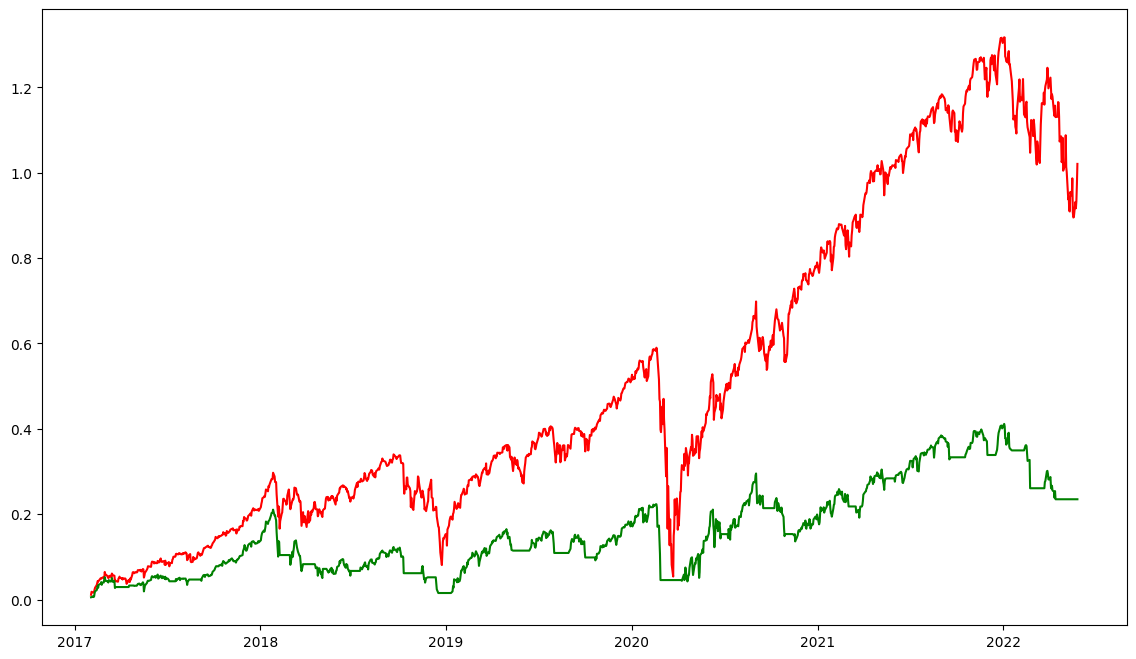

In [85]:
fig = plt.figure(figsize=(14,8))

plt.plot(df['prod_bench'], color='r', label='benchmark')
plt.plot(df['prod_strat'], color='g', label='strategy')
plt.show()

In [86]:
# Metrics 
### Calculate returns and sharpe ratio

print("benchmark return (hodling) : ", df['prod_bench'].iloc[-1])
print("strat return : ", df['prod_strat'].iloc[-1])


def calculate_sharpe(returns):
    # N = len(returns)
    N = 252  # number of trading days in a year
    #risk free rate => guaaranteed return if you put your money in the bank
    rf=0.01
    SQRTN = np.sqrt(N)
    mean = returns.mean()*N
    sigma = returns.std()*SQRTN
    sharpe = round((mean-rf)/sigma,4)
    return sharpe

benchmark return (hodling) :  1.0206404185172517
strat return :  0.23491408583051498


In [87]:
# show sharpe ratio

bench_sharpe = calculate_sharpe(df['lreturns_bench'].values)
strat_sharpe = calculate_sharpe(df['lreturns_strat'].values)

print("benchmark sharpe : ", bench_sharpe)
print("strat sharpe : ", strat_sharpe)

benchmark sharpe :  0.615
strat sharpe :  0.2488
